## 6.3 geographic visualizations

### This script will contain

__00. Import Libraries and data__

__01. Data Wrangling__

__02. Data Consistency checks__

__03. Create a choropleth__

__04. Discuss results__

### 00. Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

states_geo = r'C:\Users\Victoria\Documents\veallen20\OneDrive\Desktop\Data Analytics Career Foundry\6.0 Advanced Analytics and Dashboard Design\Examples\us-states.json'

In [4]:
states_geo

'C:\\Users\\Victoria\\Documents\\veallen20\\OneDrive\\Desktop\\Data Analytics Career Foundry\\6.0 Advanced Analytics and Dashboard Design\\Examples\\us-states.json'

In [5]:
# Import ".json" file for countries 

country_geo = r'C:\Users\Victoria\Documents\veallen20\OneDrive\Desktop\Data Analytics Career Foundry\6.0 Advanced Analytics and Dashboard Design\Bambino 2.0\02 Data\Original Data\countries_geo.json'

In [6]:
country_geo

'C:\\Users\\Victoria\\Documents\\veallen20\\OneDrive\\Desktop\\Data Analytics Career Foundry\\6.0 Advanced Analytics and Dashboard Design\\Bambino 2.0\\02 Data\\Original Data\\countries_geo.json'

In [ ]:
import json

f = open(r'C:\\Users\\Victoria\\Documents\\veallen20\\OneDrive\\Desktop\\Data Analytics Career Foundry\\6.0 Advanced Analytics and Dashboard Design\\Bambino 2.0\\02 Data\\Original Data\\countries_geo.json')

data = json.load(f)

for i in data['features']:
    print(i)

In [8]:
# Import ".geojson" file for US counties 

county_geo = r'C:\Users\Victoria\Documents\veallen20\OneDrive\Desktop\Data Analytics Career Foundry\6.0 Advanced Analytics and Dashboard Design\Bambino 2.0\02 Data\Original Data\county.geojson'

In [9]:
county_geo

'C:\\Users\\Victoria\\Documents\\veallen20\\OneDrive\\Desktop\\Data Analytics Career Foundry\\6.0 Advanced Analytics and Dashboard Design\\Bambino 2.0\\02 Data\\Original Data\\county.geojson'

In [ ]:
import json

f = open(r'C:\\Users\\Victoria\\Documents\\veallen20\\OneDrive\\Desktop\\Data Analytics Career Foundry\\6.0 Advanced Analytics and Dashboard Design\\Bambino 2.0\\02 Data\\Original Data\\county.geojson')

data = json.load(f)

for i in data['features']:
    print(i)

In [11]:
# Import ".geojson" file for Canadian Provinces 

canada_geo = r'C:\Users\Victoria\Documents\veallen20\OneDrive\Desktop\Data Analytics Career Foundry\6.0 Advanced Analytics and Dashboard Design\Bambino 2.0\02 Data\Original Data\canada_divisions.geojson'

In [12]:
canada_geo

'C:\\Users\\Victoria\\Documents\\veallen20\\OneDrive\\Desktop\\Data Analytics Career Foundry\\6.0 Advanced Analytics and Dashboard Design\\Bambino 2.0\\02 Data\\Original Data\\canada_divisions.geojson'

In [ ]:
import json

f = open(r'C:\\Users\\Victoria\\Documents\\veallen20\\OneDrive\\Desktop\\Data Analytics Career Foundry\\6.0 Advanced Analytics and Dashboard Design\\Bambino 2.0\\02 Data\\Original Data\\canada_divisions.geojson')

data = json.load(f)

for i in data['features']:
    print(i)

In [14]:
#Create file path
path = r'C:\Users\Victoria\Documents\veallen20\OneDrive\Desktop\Data Analytics Career Foundry\6.0 Advanced Analytics and Dashboard Design\Bambino 2.0'

In [15]:
#Import baseball data
df = pd.read_csv(os.path.join(path, '02 Data', 'Cleaned Data', 'baseball_dv.csv'), index_col = False)

In [16]:
df.head()

,rank,combined_key,name,year,city,state,country,bats,throws,team_signed,...,league,games,war,actual_salary,league_r,bats_r,throws_r,team_sr,team_pr,position_r
0,1,"Mike Trout, 2019",Mike Trout,2019,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,AL,134,7.9,17666667.0,0,0,0,12,12,8
1,1,"Mike Trout, 2020",Mike Trout,2020,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,AL,53,1.8,37666666.0,0,0,0,12,12,8
2,1,"Mike Trout, 2021",Mike Trout,2021,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,AL,36,1.8,37116667.0,0,0,0,12,12,8
3,1,"Mike Trout, 2022",Mike Trout,2022,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,AL,119,6.3,37116666.0,0,0,0,12,12,8
4,1,"Mike Trout, 2023",Mike Trout,2023,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,AL,81,3.0,37116667.0,0,0,0,12,12,8


In [17]:
df.shape

(1481, 29)

### 01. Data Wrangling

In [18]:
#Look at column names
df.columns

Index(['rank', 'combined_key', 'name', 'year', 'city', 'state', 'country',
       'bats', 'throws', 'team_signed', 'team_locale', 'team_locale_county',
       'position', 'contract_start', 'contract_end', 'contract_length',
       'total_salary', 'age', 'team_played', 'league', 'games', 'war',
       'actual_salary', 'league_r', 'bats_r', 'throws_r', 'team_sr', 'team_pr',
       'position_r'],
      dtype='object')

##### What do I want to look at?
I would like to find the number of contracts for each team.

I would like to find the number of contracts from each birthplace (ie per state).

I would like to see the ditribution of money spent by each team.

I would like to see the average war value for each team.

In [19]:
#Create a list of necessary columns
columns = ['rank', 'name', 'city', 'state', 'country', 'team_signed', 'team_locale_county', 'total_salary', 'war']

In [20]:
#Createa a subset
df_spatial = df[columns]

In [21]:
df_spatial.shape

(1481, 9)

In [22]:
df_spatial.head()

,rank,name,city,state,country,team_signed,team_locale_county,total_salary,war
0,1,Mike Trout,"Vineland, New Jersey",New Jersey,United States,LAA,"Orange, California",426500000,7.9
1,1,Mike Trout,"Vineland, New Jersey",New Jersey,United States,LAA,"Orange, California",426500000,1.8
2,1,Mike Trout,"Vineland, New Jersey",New Jersey,United States,LAA,"Orange, California",426500000,1.8
3,1,Mike Trout,"Vineland, New Jersey",New Jersey,United States,LAA,"Orange, California",426500000,6.3
4,1,Mike Trout,"Vineland, New Jersey",New Jersey,United States,LAA,"Orange, California",426500000,3.0


### 02. Data Consistency checks

__Missing values check__

In [23]:
#Check for missing values
df_spatial.isnull().sum()

rank                    0
name                    0
city                    0
state                 494
country                 0
team_signed             0
team_locale_county      0
total_salary            0
war                     1
dtype: int64

In [24]:
# Create a subset, df_nan_war, to view missing values in 'war' column
df_nan_war = df_spatial[df_spatial['war'].isnull() == True]

In [25]:
#Create subset without missing 'war' value
df_spatial_W = df_spatial[df_spatial['war'].isnull() == False]

In [26]:
# Create a subset, df_nan_state, to view missing values in 'state' column
df_nan_s = df_spatial_W[df_spatial_W['state'].isnull() == True]

In [27]:
#Create subset without missing 'state' values
df_spatial_WAS = df_spatial_W[df_spatial_W['state'].isnull() == False]

In [28]:
df_baseball = df_spatial_WAS

In [29]:
df_baseball.isnull().sum()

rank                  0
name                  0
city                  0
state                 0
country               0
team_signed           0
team_locale_county    0
total_salary          0
war                   0
dtype: int64

In [30]:
df_baseball.shape

(986, 9)

__Duplicates check__

In [31]:
dups = df_baseball[df_baseball.duplicated()]

In [32]:
dups

,rank,name,city,state,country,team_signed,team_locale_county,total_salary,war
2,1,Mike Trout,"Vineland, New Jersey",New Jersey,United States,LAA,"Orange, California",426500000,1.8
44,15,Alex Rodriguez,New York,New York,United States,NYY,"Bronx, New York",275000000,4.2
57,17,Alex Rodriguez,New York,New York,United States,TEX,"Tarrant, Texas",252000000,4.2
64,17,Alex Rodriguez,New York,New York,United States,TEX,"Tarrant, Texas",252000000,9.4
114,24,David Price,"Murfreesboro, Tennessee",Tennessee,United States,BOS,"Suffolk, Massachusetts",217000000,1.6
121,25,Clayton Kershaw,Dallas,Texas,United States,LAD,"Los Angeles, California",215000000,3.3
143,30,Zack Greinke,"Orlando, Florida",Florida,United States,ARI,"Maricopa County, Arizona",206500000,1.1
168,35,Jason Heyward,"Ridgewood, New Jersey",California,United States,CHC,"Cook, Illinois",184000000,1.0
188,39,Justin Verlander,Manakin-Sabot,Virginia,United States,DET,"Wayne, Michigan",180000000,7.4
245,51,Chris Davis,"Longview, Texas",Texas,United States,BAL,"Baltimore, Maryland",161000000,-1.0


In [33]:
#Create new df_baseball_nd without duplicates
df_baseball_nd = df_baseball.drop_duplicates()

In [34]:
df_baseball_nd.head()

,rank,name,city,state,country,team_signed,team_locale_county,total_salary,war
0,1,Mike Trout,"Vineland, New Jersey",New Jersey,United States,LAA,"Orange, California",426500000,7.9
1,1,Mike Trout,"Vineland, New Jersey",New Jersey,United States,LAA,"Orange, California",426500000,1.8
3,1,Mike Trout,"Vineland, New Jersey",New Jersey,United States,LAA,"Orange, California",426500000,6.3
4,1,Mike Trout,"Vineland, New Jersey",New Jersey,United States,LAA,"Orange, California",426500000,3.0
5,2,Mookie Betts,"Nashville, Tennessee",Tennessee,United States,LAD,"Los Angeles, California",365000000,4.0


In [36]:
#create a new subset without the 'war' value to find number of total contracts
df_baseball_nw = df_baseball_nd[['rank', 'name', 'city', 'state', 'country', 'team_signed', 'team_locale_county', 'total_salary']]

In [37]:
dups_2 = df_baseball_nw[df_baseball_nw.duplicated()]

In [38]:
dups_2.shape

(734, 8)

In [39]:
#Create new df_baseball_nd without duplicates
df_baseball_nd_2 = df_baseball_nw.drop_duplicates()

In [40]:
df_baseball_nd_2.shape

(210, 8)

__Extreme values checks__

<Axes: xlabel='war', ylabel='Count'>

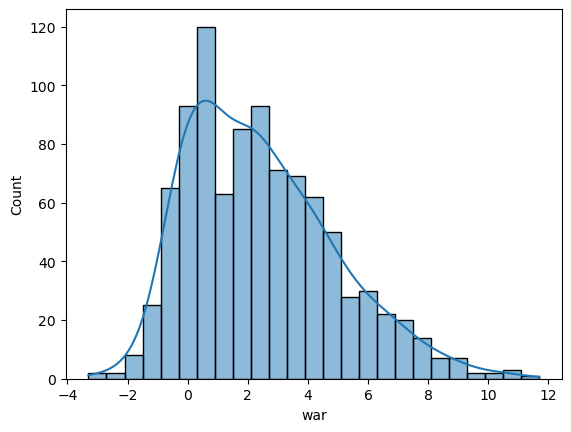

In [41]:
#Extreme value checks 'war'
sns.histplot(df_baseball_nd['war'], bins = 25, kde = True)

<Axes: xlabel='total_salary', ylabel='Count'>

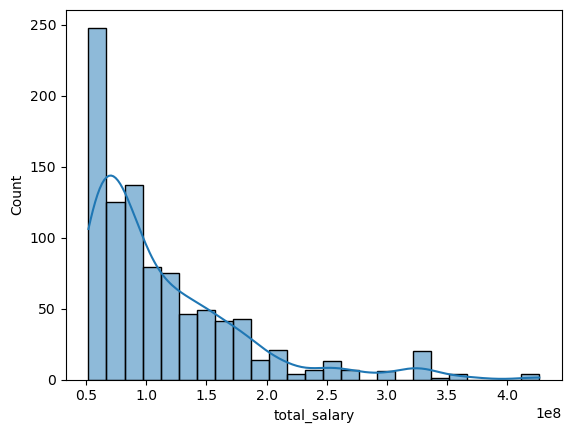

In [42]:
#Extreme value checks 'total_salary'
sns.histplot(df_baseball_nd['total_salary'], bins = 25, kde = True)

No extreme values

### 03. Create choropleth maps
__choropleth map of contracts from each US birthplace (ie per state)__

In [43]:
df_baseball_nd_2.head(50)

,rank,name,city,state,country,team_signed,team_locale_county,total_salary
0,1,Mike Trout,"Vineland, New Jersey",New Jersey,United States,LAA,"Orange, California",426500000
5,2,Mookie Betts,"Nashville, Tennessee",Tennessee,United States,LAD,"Los Angeles, California",365000000
8,3,Aaron Judge,"Linden, New Jersey",California,United States,NYY,"Bronx, New York",360000000
9,4,Manny Machado,"Hialeah, Florida",Florida,United States,SDP,"San Diego, California",350000000
14,7,Bryce Harper,Las Vegas,Nevada,United States,WSN,"District of Columbia, District of Columbia",330000000
19,8,Corey Seager,"Charlotte, North Carolina",North Carolina,United States,TEX,"Tarrant, Texas",325000000
21,8,Giancarlo Stanton,Los Angeles,California,United States,MIA,"Miami-Dade, Florida",325000000
30,10,Gerrit Cole,"Newport Beach, California",California,United States,NYY,"Bronx, New York",324000000
35,12,Manny Machado,"Hialeah, Florida",Florida,United States,SDP,"San Diego, California",300000000
40,12,Trea Turner,"Boynton Beach, Florida",Florida,United States,PHI,"Philadelphia, Pennsylvania",300000000


In [44]:
# Finding average availability in each neighbourhood
df_state_c = df_baseball_nd_2.groupby(['state'], as_index=False)['team_signed'].count()

In [45]:
df_state_c

,state,team_signed
0,Alabama,3
1,Arizona,2
2,Arkansas,4
3,California,43
4,Colorado,6
5,Connecticut,3
6,Delaware,1
7,Florida,25
8,Georgia,13
9,Illinois,6


__Choropleth map for number of contracts given to players by birthplace (state)__

In [73]:
# Setup a folium map at a high-level zoom
map01 = folium.Map(location = [37, -97], zoom_start = 3.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = states_geo,
    data = df_state_c,
    columns = ['state', 'team_signed'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=0.75, line_opacity=0.3,
    nan_fill_color = 'white',
    legend_name = "Number of Contracts").add_to(map01)
folium.LayerControl().add_to(map01)

map01

In [74]:
map01.save('plot_01_data.html')

__Choropleth map for money spent by each team__

In [49]:
# Finding average total_salary per team
df_team_sal_avg = df_baseball_nd_2.groupby(['team_locale_county'], as_index=False)['total_salary'].mean()

In [50]:
df_team_sal_avg

,team_locale_county,total_salary
0,"Alameda, California",6.600000e+07
1,"Allegheny, Pennsylvania",7.891667e+07
2,"Baltimore, Maryland",8.692000e+07
3,"Bronx, New York",1.454444e+08
4,"Cook, Illinois",1.039375e+08
5,"Cuyahoga, Ohio",5.516667e+07
6,"Denver, Colorado",1.305278e+08
7,"District of Columbia, District of Columbia",1.788750e+08
8,"DuPage, Illinois",6.086250e+07
9,"Fulton, Georgia",9.790909e+07


In [63]:
# Setup a folium map at a high-level zoom
map02 = folium.Map(location = [37, -97], zoom_start = 3.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = county_geo,
    data = df_team_sal_avg,
    columns = ['team_locale_county', 'total_salary'],
    key_on = 'feature.properties.COUNTY_STATE_NAME', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=.75, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "Average Total Contract Salary by Team").add_to(map02)
folium.LayerControl().add_to(map02)

map02

In [62]:
map02.save('plot_02_data.html')

__Choropleth that examines war__

In [65]:
# Finding average war per player based on birthpalce (US born players, only)
df_avg_war = df_baseball_nd.groupby(['state'], as_index=False)['war'].mean()

In [66]:
df_avg_war

,state,war
0,Alabama,1.425000
1,Arizona,2.508333
2,Arkansas,3.200000
3,California,2.713426
4,Colorado,1.547059
5,Connecticut,1.000000
6,Delaware,4.650000
7,Florida,2.511111
8,Georgia,2.701786
9,Illinois,2.230556


In [70]:
# Setup a folium map at a high-level zoom
map03 = folium.Map(location = [37, -97], zoom_start = 3.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = states_geo,
    data = df_avg_war,
    columns = ['state', 'war'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=.75, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "Average WAR by Player Birthplace").add_to(map03)
folium.LayerControl().add_to(map03)

map03

In [71]:
map03.save('plot_03_data.html')

__Choropleth of war by player birth country__

In [75]:
# Finding average war per player based on birthpalce (country)
df_avg_war_c = df_spatial_W.groupby(['country'], as_index=False)['war'].mean()


In [76]:
df_avg_war_c

,country,war
0,Aruba,4.066667
1,Australia,1.400000
2,Canada,2.352500
3,Cuba,1.175000
4,Curaçao,3.533333
5,Dominican Republic,3.040964
6,Japan,2.280000
7,Panama,1.214286
8,Puerto Rico,2.718605
9,South Korea,1.209091


In [79]:
# I need to change 'United States' to 'United States of America' to work with my .json file for countries
df_avg_war_c.loc[df_avg_war_c['country'] == 'United States', 'country'] = 'United States of America'

In [80]:
df_avg_war_c

,country,war
0,Aruba,4.066667
1,Australia,1.400000
2,Canada,2.352500
3,Cuba,1.175000
4,Curaçao,3.533333
5,Dominican Republic,3.040964
6,Japan,2.280000
7,Panama,1.214286
8,Puerto Rico,2.718605
9,South Korea,1.209091


In [88]:
# Setup a folium map at a high-level zoom
map04 = folium.Map(location = [37, 0], zoom_start = 2)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo,
    data = df_avg_war_c,
    columns = ['country', 'war'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=.75, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "Average WAR by Player Birthplace (Country)").add_to(map04)
folium.LayerControl().add_to(map04)

map04

In [89]:
map04.save('plot_04_data.html')

### 04. Discuss Results
__Choropleth map for number of contracts given to players by birthplace (state)__
From this map I can see that a majority of MLB contracts are given to players from Califronia. This isn't surprising given that California has a large population and three MLB teams, the most in any state. I am suprised that New York doesn't have a larger number of signed players though. 

__Choropleth map for money spent by each team__
This choropleth shows the average amount of money spent by each MLB team for player contracts. It should be noted that the Toronto Bluejays are being represented in Niagara, New York as I couldn't find a JSON/GeoJSON file that contained both US counties/Canadian census divisions or US states/Canadian Provinces. While I think that this map provides helpful information, unfortunately it is not very readable. The areas that represent the teams are too small. However, if you take the time to look you can see that the San Diego Padres have spent the most money on average. While I think that this information is interesting, I don't think that this is the best way to present this data. I don't think I will use this for my final presentation.

Further questions: This map has made me curious to see the average war and total_salary values for each team. Also average war and contract length.

__Choropleth that examines war by player birth state (US born players only)__
From this map I can see that players born in New Jersey and Delaware sign have higher average WAR values. States like New York, Indiana, Mississippi, and Georgia also have high avergae WAR values. 

Further questions: To better see the spread of this data and other variables, such as anything to do with laterality, I would consider looking at this data on a county level, similar to my second chorpleth. I would also consider possibly making an overlay map that examines war like this but focused on team locations that also shows avg total salary. Then I could have more insight into if higher valued contracts correlate to higher WAR values.

__Choropleth of war by player birth country__
This is similar to the previous choropleth but encompases countries. I am not suprised at all the players from the Dominican Republic have the highest WAR values. However, I am disappointed that the JSON file I have doens't include boundaries for Aruba or Curacao as those countries actually have players with the highest average war values. 

Further questions: Do international players have higher war values than players from the US? Do US born players have bigger contracts than international players?